# ART for scikit-learn LogisticRegression

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris

import numpy as np
from matplotlib import pyplot as plt
# plt.rcParams['figure.figsize'] = [10, 10]

from art.classifiers import SklearnSVC
from art.attacks.projected_gradient_descent import ProjectedGradientDescent
from art.utils import load_mnist

In [2]:
plt.rcParams['figure.figsize'] = [10, 10]

# 1 Simple Example

In [3]:
x_train, y_train = load_iris(return_X_y=True)
x_train = x_train[y_train < 2][:, [0, 1]]
y_train = y_train[y_train < 2]

In [4]:
x_train[:, 0][y_train == 0] -= 2

In [5]:
skl_svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
skl_svc.fit(X=x_train, y=y_train)

/home/bbuesser/venv36/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
art_svc = SklearnSVC(clip_values=(-100, 100), model=skl_svc)
pgd = ProjectedGradientDescent(classifier=art_svc, norm=1, eps=1.0, eps_step=0.01, max_iter=200, targeted=False, num_random_init=0, batch_size=128)
x_train_adv = pgd.generate(x_train)

In [7]:
def plot_svm(skl_svc, x_train, y_train, x_train_adv):
    for i in range(y_train[y_train==1].shape[0]):
        x_1_0 = x_train[y_train==1][i, 0]
        x_1_1 = x_train[y_train==1][i, 1]
        x_2_0 = x_train_adv[y_train==1][i, 0]
        x_2_1 = x_train_adv[y_train==1][i, 1]
        plt.plot([x_1_0, x_2_0], [x_1_1, x_2_1], c='black', zorder=1)
    
    plt.scatter(x_train[y_train==0][:, 0], x_train[y_train==0][:, 1], zorder=2)
    plt.scatter(x_train[y_train==1][:, 0], x_train[y_train==1][:, 1], zorder=2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim((2, 8))
    plt.ylim((0, 6))

    for sv in skl_svc.support_vectors_:
        plt.scatter(sv[0], sv[1], s=250, facecolors='none', edgecolors='r', zorder=2)

    h = .01
    x_min, x_max = 2, 8
    y_min, y_max = 0, 6

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = skl_svc.predict(np.c_[xx.ravel(), yy.ravel()])

    if skl_svc.probability:
        Z_proba = skl_svc.predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z_proba = Z_proba[:, 1].reshape(xx.shape)
        plt.contourf(xx, yy, Z_proba)
    else:
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    # plot adversarial
    # plt.scatter(x_train_adv[y_train==0][:, 0], x_train_adv[y_train==0][:, 1])
    plt.scatter(x_train_adv[y_train==1][:, 0], x_train_adv[y_train==1][:, 1], zorder=2)
    # plt.gca().set_aspect('equal', adjustable='box')
    # plt.xlim((2, 8))
    # plt.ylim((0, 6))

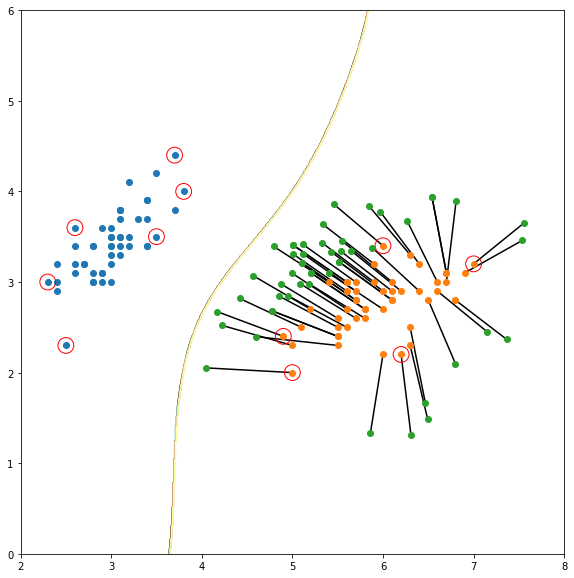

In [8]:
plot_svm(skl_svc, x_train, y_train, x_train_adv)

In [10]:
skl_svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)
skl_svc.fit(X=x_train, y=y_train)

/home/bbuesser/venv36/lib64/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
art_svc = SklearnSVC(clip_values=(-100, 100), model=skl_svc)
pgd = ProjectedGradientDescent(classifier=art_svc, norm=1, eps=1.0, eps_step=0.01, max_iter=200, targeted=False, num_random_init=0, batch_size=128)
x_train_adv = pgd.generate(x_train)

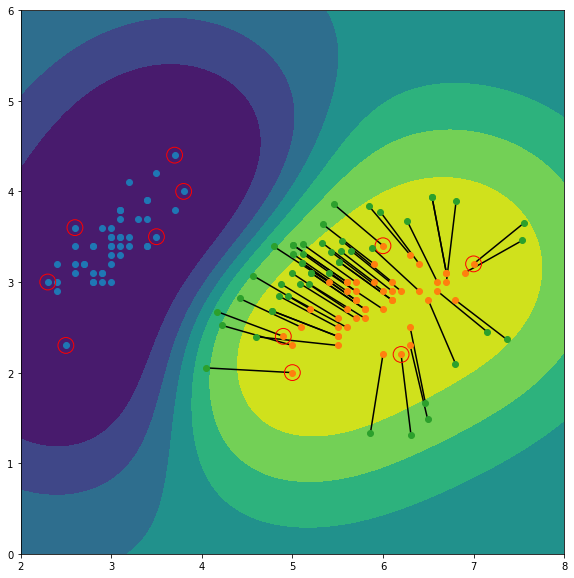

In [12]:
plot_svm(skl_svc, x_train, y_train, x_train_adv)

In [9]:
asfd

NameError: name 'asfd' is not defined

# 2 MNIST Example

## 2.1 Load and transform MNIST dataset

In [ ]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_mnist()

n_samples_train = x_train.shape[0]
n_features_train = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
n_samples_test = x_test.shape[0]
n_features_test = x_test.shape[1] * x_test.shape[2] * x_test.shape[3]

x_train = x_train.reshape(n_samples_train, n_features_train)
x_test = x_test.reshape(n_samples_test, n_features_test)

y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

n_samples_max = 200
x_train = x_train[0:n_samples_max]
y_train = y_train[0:n_samples_max]
x_test = x_test[0:n_samples_max]
y_test = y_test[0:n_samples_max]

## 2.2 Train LogisticRegression classifier

In [ ]:
skl_svc = SVC(C=1.0, kernel='linear', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)

In [ ]:
skl_svc.fit(X=x_train, y=y_train)

## 2.3 Create and apply ProjectedGradientDescent Attack with ART

In [ ]:
art_svc = SklearnSVC(model=skl_svc)

In [ ]:
pgd = ProjectedGradientDescent(classifier=art_svc, norm=np.inf, eps=.3, eps_step=0.1, max_iter=20, targeted=False, num_random_init=0,
                 batch_size=128)

In [ ]:
x_train_adv = pgd.generate(x_train)

In [ ]:
x_test_adv = pgd.generate(x_test)

## 2.4 Evaluate LogisticRegression classifier on benign and adversarial samples

In [ ]:
score = skl_svc.score(x_train, y_train)
print("Benign Training Score: %.4f" % score)

In [ ]:
plt.matshow(x_train[0, :].reshape((28, 28)))
plt.clim(0, 1)

In [ ]:
prediction = skl_svc.predict(x_train[0:1, :])[0]
print("Benign Training Predicted Label: %i" % prediction)

In [ ]:
score = skl_svc.score(x_train_adv, y_train)
print("Adversarial Training Score: %.4f" % score)

In [ ]:
plt.matshow(x_train_adv[0, :].reshape((28, 28)))
plt.clim(0, 1)

In [ ]:
prediction = skl_svc.predict(x_train_adv[0:1, :])[0]
print("Adversarial Training Predicted Label: %i" % prediction)

In [ ]:
score = skl_svc.score(x_test, y_test)
print("Benign Test Score: %.4f" % score)

In [ ]:
plt.matshow(x_test[0, :].reshape((28, 28)))
plt.clim(0, 1)

In [ ]:
prediction = skl_svc.predict(x_test[0:1, :])[0]
print("Benign Test Predicted Label: %i" % prediction)

In [ ]:
score = skl_svc.score(x_test_adv, y_test)
print("Adversarial Test Score: %.4f" % score)

In [ ]:
plt.matshow(x_test_adv[0, :].reshape((28, 28)))
plt.clim(0, 1)

In [ ]:
prediction = skl_svc.predict(x_test_adv[0:1, :])[0]
print("Adversarial Test Predicted Label: %i" % prediction)

## 2.5 Investigate dependence on attack budget eps

In [ ]:
eps_list = [0.1, 0.4, 0.6, 0.8, 1.0]
score_list = list()

for eps in eps_list:
    print(eps)
    pgd = ProjectedGradientDescent(classifier=art_svc, norm=np.inf, eps=eps, eps_step=0.05, max_iter=20, targeted=False, num_random_init=0,
                 batch_size=128)
    x_test_adv = pgd.generate(x_test)
    score = skl_svc.score(x_test_adv, y_test)
    score_list.append(score)

plt.plot(eps_list, score_list)
plt.xlabel('eps')
plt.ylabel('Test Accuracy')
plt.ylim((0, 1))

## 2.6 Targeted PGD attack

In [ ]:
pgd = ProjectedGradientDescent(classifier=art_svc, norm=np.inf, eps=0.5, eps_step=0.01, max_iter=20, targeted=True, num_random_init=3, batch_size=128)
y_test_target = np.zeros((y_test.shape[0], 10))
target_label = 7
y_test_target[:, target_label] = 1
x_test_adv = pgd.generate(x_test, y=y_test_target)
score = skl_svc.score(x_test_adv, y_test)

In [ ]:
score = skl_svc.score(x_test_adv, np.argmax(y_test_target, axis=1))
print("Targeted Benign Test Score: %.4f" % score)

In [ ]:
plt.matshow(x_test_adv[16, :].reshape((28, 28)))
plt.clim(0, 1)

In [ ]:
prediction = skl_svc.predict(x_test_adv[16:17, :])[0]
print("Targeted Benign Test Predicted Label: %i" % prediction)